# Co-occurrence Viz

In [1]:
import pandas as pd

In [77]:
reference = pd.read_csv("reference_extract.csv", 
                        sep="\t", 
                        index_col=0,
                       converters={"citations": lambda x: x.strip("[]").split(", "),
                                  "regulations": lambda x: x.strip("[]").split(", "),
                                  "courts": lambda x: x.strip("[]").split(", ")})

In [80]:
type(reference.iloc[0,1])

list

In [81]:
cite = reference[['citations', 'file_name']].\
        rename(index=str, columns={"file_name": "title",
                                  "citations": "keywords"})

In [86]:
type(cite.iloc[0,0])

list

In [111]:
keywords_array=[]
for index, row in cite.head().iterrows():
    keywords=row['keywords']
    for kw in keywords:
        keywords_array.append((kw, row['keywords']))



In [112]:
kw_df = pd.DataFrame(keywords_array).rename(columns={0:'keyword', 1:'keywords'})

In [113]:
kw_df.head()

,keyword,keywords
0,'813 F.3d 1368',"['813 F.3d 1368', '805 F.3d 1368', '467 F.3d 1..."
1,'805 F.3d 1368',"['813 F.3d 1368', '805 F.3d 1368', '467 F.3d 1..."
2,'467 F.3d 1355',"['813 F.3d 1368', '805 F.3d 1368', '467 F.3d 1..."
3,'299 F.3d 1313',"['813 F.3d 1368', '805 F.3d 1368', '467 F.3d 1..."
4,'639 F.3d 1303',"['813 F.3d 1368', '805 F.3d 1368', '467 F.3d 1..."


In [114]:
from collections import OrderedDict

In [115]:
document = kw_df.keywords
names = kw_df.keyword.tolist()
 
document_array = []
for item in document:
    items = item
    document_array.append((items))
 
occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)
 
# Find the co-occurrences:
for l in document_array:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1
 
co_occur = pd.DataFrame.from_dict(occurrences )

In [118]:
co_occur.shape

(65, 65)

In [119]:
import matplotlib.pyplot as plt

In [121]:
%matplotlib inline

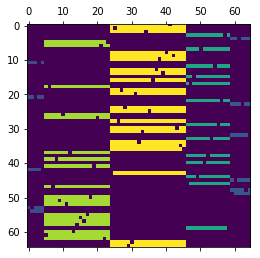

In [122]:
plt.matshow(co_occur)